# LSTM AutoEncoder for Submit
- 기본적인 LSTM 구현 코드입니다.
- Validation 데이터를 가지고 평가하는 것이 목적이 아니라, 오직 제출이 목적입니다.
- 평가하는 항목은 LSTM_Validation.ipynb를 참고해주세요.

### 패키지 로딩

In [86]:
### Data Handling
import pandas as pd
import numpy as np

### seed fix
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

### KERAS and TensorFlow
import keras
import tensorflow as tf

### 데이터 로딩

In [87]:
### 데이터 셋 불러오기
train = pd.read_csv('C:/LG_Aimers/data/train.csv')
X = train[['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08',
       'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26',
       'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35',
       'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44',
       'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53',
       'X_54', 'X_55', 'X_56']]
y = train[['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']]

### 3차원 형 변환(LSTM에 들어가기 위해선 3차원 형태로 데이터가 정의되어야 한다.)
X=np.array(X)
X = X.reshape(X.shape[0],1,X.shape[1])
y=np.array(y)
y = y.reshape(y.shape[0],1,y.shape[1])
print("X : ", X.shape)
print("y : ", y.shape)

### 오토인코더 모델 구축

In [ ]:
### 모델 구축 함수 정의
def lstm_autoencoder():
    feature_number = X.shape[2]
    lstm_ae = keras.models.Sequential()
 
    # 인코더
    lstm_ae.add(keras.layers.LSTM(512, activation="relu", input_shape=(1, feature_number), return_sequences=True))
    lstm_ae.add(keras.layers.LSTM(256, activation="relu", return_sequences=True))
    #lstm_ae.add(keras.layers.RepeatVector(1))
 
    # 디코더
    lstm_ae.add(keras.layers.LSTM(128, activation="relu", return_sequences=True))
    lstm_ae.add(keras.layers.LSTM(64, activation="relu", return_sequences=True))
    lstm_ae.add(keras.layers.LSTM(32, activation="relu", return_sequences=True))
    lstm_ae.add(keras.layers.TimeDistributed(keras.layers.Dense(14)))
 
    print(lstm_ae.summary())
    return lstm_ae
 
lstm_ae0 = lstm_autoencoder()

### 모델 최적화

In [ ]:
# 파라미터 설정
epochs = 300
batch_size = 128
learning_rate = 0.001
validation = 0.2

# compile
lstm_ae0.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate))

# 모델학습
history = lstm_ae0.fit(
    X,
    y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation,
    callbacks=[
        #tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode="min")
    ],
)
 
lstm_ae0.save('lstm_ae0_submit.h5') # 모델 저장

### 모델 학습 진행 결과 파악

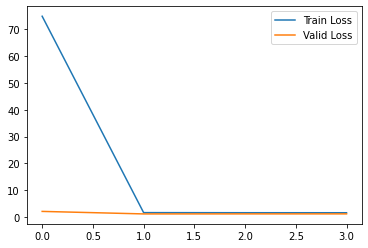

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Valid Loss")
plt.legend()
plt.show()

### 예측 및 제출

In [ ]:
### test set 불러오기
test = pd.read_csv('C:/LG_Aimers/data/test.csv')
test = test.drop(columns=["ID"])
test = np.array(test)
test = test.reshape(test.shape[0],1,test.shape[1])
test = lstm_ae0.predict(test)
test = test.reshape(test.shape[0],test.shape[2])
test = pd.DataFrame(test)

### submission 양식 맞추기
submission = pd.read_csv("C:\LG_Aimers\data\sample_submission.csv")
id=submission["ID"]
test.columns=submission.drop(columns = ["ID"]).columns
submission_final = pd.concat([id,test],axis = 1)

### 제출하기
submission_final.to_csv("C:\LG_Aimers\code\lstm_submit.csv", index=False)